# Removing clouds
Let's use EOReader with optical data, in order to remove clouds from brightness temperature measurements

## Imports

In [1]:
import os
from eoreader.reader import Reader
from eoreader.bands import TIR_1, CLOUDS

## Open the product

First, open a `Landsat-8 OLI-TIRS` collection 2 product.

In [2]:
path = os.path.join("/home", "data", "DATA", "PRODS", "LANDSATS_COL2", "LC08_L1TP_200030_20201220_20210310_02_T1.tar")
reader = Reader()
prod = reader.open(path)
prod

eoreader.LandsatProduct 'LC08_L1TP_200030_20201220_20210310_02_T1'
Attributes:
	condensed_name: 20201220T104856_L8_200030_OLI_TIRS
	path: /home/data/DATA/PRODS/LANDSATS_COL2/LC08_L1TP_200030_20201220_20210310_02_T1.tar
	constellation: Landsat-8
	sensor type: Optical
	product type: L1
	default pixel size: 30.0
	default resolution: 30.0
	acquisition datetime: 2020-12-20T10:48:56
	band mapping:
		COASTAL_AEROSOL: 1
		BLUE: 2
		GREEN: 3
		RED: 4
		NIR: 5
		NARROW_NIR: 5
		CIRRUS: 9
		SWIR_1: 6
		SWIR_2: 7
		THERMAL_IR_1: 10
		THERMAL_IR_2: 11
		PANCHROMATIC: 8
	needs extraction: False
	cloud cover: 16.36
	tile name: 200030

## Load clouds and TIR band

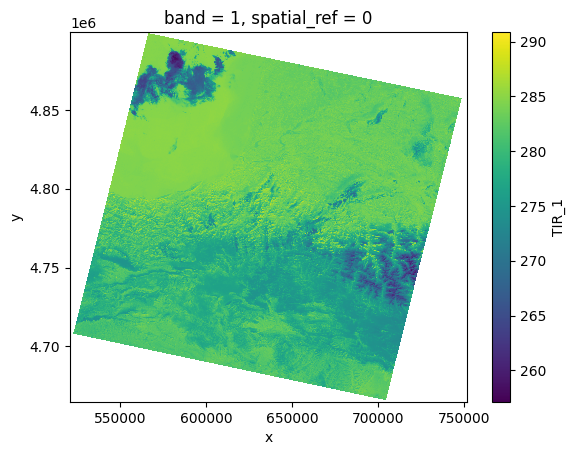

In [3]:
# Load those bands as a dict of xarray.DataArray
bands = prod.load([TIR_1, CLOUDS])
bands[TIR_1].plot(cmap="viridis")

In [ ]:
bands[CLOUDS].plot()

## Remove clouds from TIR band

In [ ]:
cloud_free = bands[TIR_1].where(bands[CLOUDS] == 0)
cloud_free.plot(cmap="viridis")